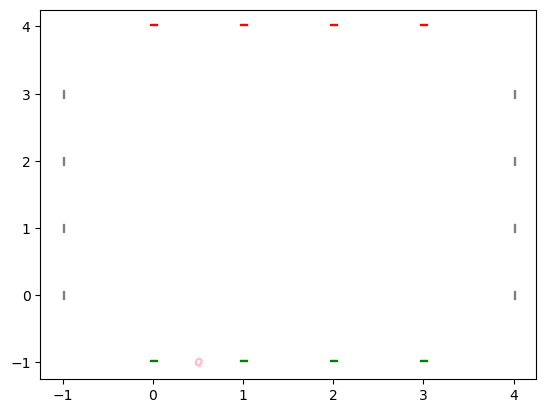

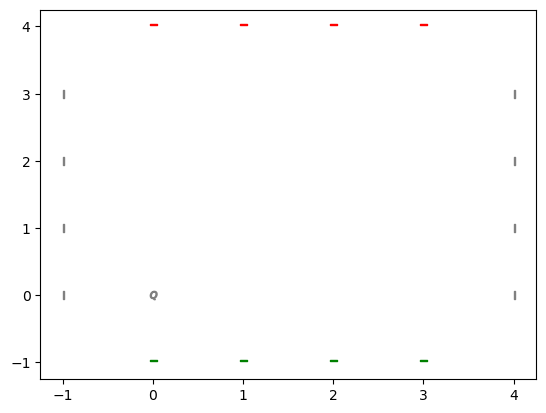

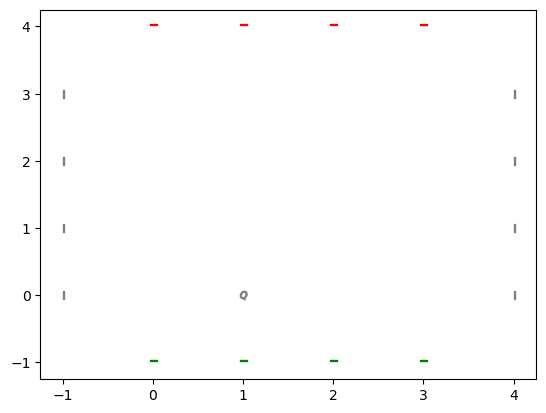

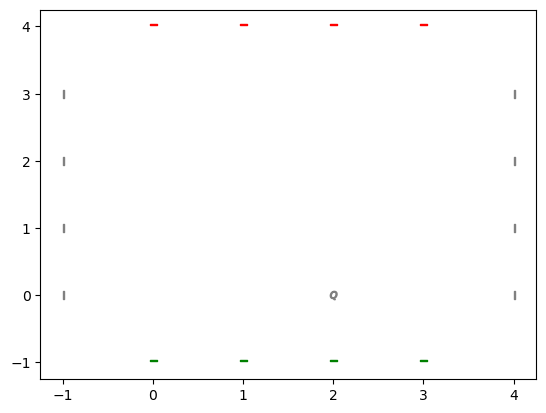

In [18]:
"""
NQLL-p
N-queens linked lists python version
Dr Keith Reid
Coding Club
Jan 2024
"""

import numpy as np
import matplotlib.pyplot as plt

def get_n():
    n = 4
    return n

class Node:
    def __init__(self, x, y, a, b, l, r, flavour):
        self.x    = x
        self.y    = y
        self.a    = a
        self.b    = b
        self.l    = l
        self.r    = r
        self.flavour = flavour
    
def draw(nodes):
    xs = [n.x for n in nodes if n.flavour=='A']
    ys = [n.y for n in nodes if n.flavour=='A']
    plt.scatter(xs, ys, c='red', marker="$-$")
    
    xs = [n.x for n in nodes if n.flavour=='B']
    ys = [n.y for n in nodes if n.flavour=='B']
    plt.scatter(xs, ys, c='green', marker="$-$")
    
    xs = [n.x for n in nodes if n.flavour=='N']
    ys = [n.y for n in nodes if n.flavour=='N']
    plt.scatter(xs, ys, c='grey', marker="$|$")
    
    xs = [n.x for n in nodes if n.flavour=='S']
    ys = [n.y for n in nodes if n.flavour=='S']
    plt.scatter(xs, ys, c='pink', marker="$Q$")
    
    xs = [n.x for n in nodes if n.flavour=='P']
    ys = [n.y for n in nodes if n.flavour=='P']
    plt.scatter(xs, ys, c='grey', marker="$Q$")
    plt.show()
    
if __name__=="__main__":
    n        = get_n()
    
    # search, link, unlink using these initialised lists and the expected coordinates
    
    above_N  = [Node(x,  n,  '_', '_', '_', '_', 'A') for x in range(n)]
    below_N  = [Node(x, -1,  '_', '_', '_', '_', 'B') for x in range(n)]
    left_N   = [Node(-1, y,  '_', '_', '_', '_', 'N') for y in range(n)]
    right_N  = [Node(n,  y,  '_', '_', '_', '_', 'N') for y in range(n)]
    seed     =  Node(0.5,-1, '_', '_', '_', '_', 'S')
    current  = seed
    banned   = []
    proposed        = [Node(x, current.y+1, '_', '_', '_', '_', 'P') for x in range(n)]
    for this_prop in proposed:
        every           = above_N + below_N + left_N + right_N + [current]
        draw(every)
        current         = this_prop    
        
    
    
    